In [ ]:
#pip install tensorflow

In [1]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib
data_dir = pathlib.Path('train')
test_dir = pathlib.Path('test')

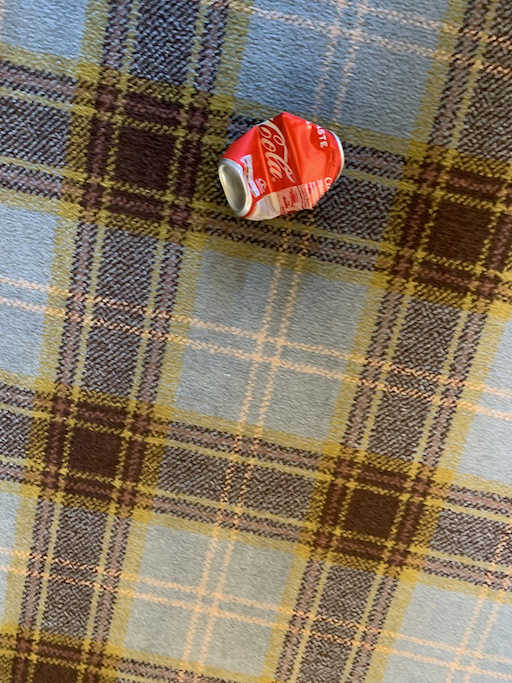

In [4]:
#visualize some data
import PIL
Recyclable = list(data_dir.glob('Recyclable/*'))
PIL.Image.open(str(Recyclable[0]))

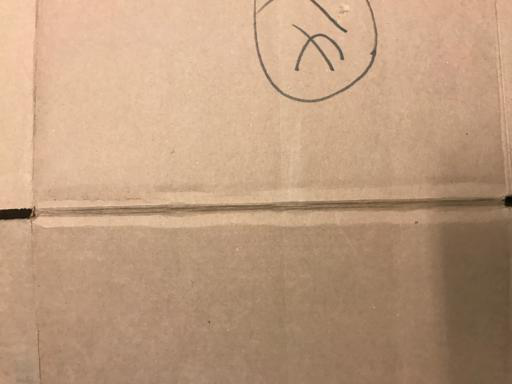

In [5]:
#visualize some data
import PIL
Non_recyclable = list(data_dir.glob('Non_recyclable/*'))
PIL.Image.open(str(Non_recyclable[0]))

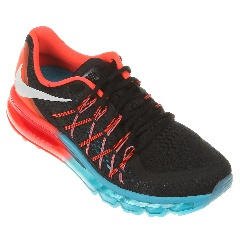

In [6]:
#import PIL
#nike = list(data_dir.glob('nike/*'))
#PIL.Image.open(str(nike[3]))

In [ ]:
#load datasets using tf.keras.utils.image_dataset_from_directory

In [6]:
#set parameters
batch_size = 32
img_height = 180
img_width = 180

In [7]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2268 files belonging to 2 classes.
Using 1815 files for training.


In [8]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2268 files belonging to 2 classes.
Using 453 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['Non_recyclable', 'Recyclable']


In [10]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [11]:
#using cache and prefetch
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
# create a basic Keras model

In [12]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [15]:
#train the model
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
57/57 [==============================] - 12s 177ms/step - loss: 0.5322 - accuracy: 0.7438 - val_loss: 0.3167 - val_accuracy: 0.8565
Epoch 2/10
57/57 [==============================] - 9s 163ms/step - loss: 0.3148 - accuracy: 0.8601 - val_loss: 0.3589 - val_accuracy: 0.8565
Epoch 3/10
57/57 [==============================] - 9s 166ms/step - loss: 0.2302 - accuracy: 0.9036 - val_loss: 0.2518 - val_accuracy: 0.8985
Epoch 4/10
57/57 [==============================] - 9s 167ms/step - loss: 0.1736 - accuracy: 0.9317 - val_loss: 0.2124 - val_accuracy: 0.9294
Epoch 5/10
57/57 [==============================] - 9s 166ms/step - loss: 0.1324 - accuracy: 0.9466 - val_loss: 0.2308 - val_accuracy: 0.9095
Epoch 6/10
57/57 [==============================] - 9s 160ms/step - loss: 0.0808 - accuracy: 0.9730 - val_loss: 0.1970 - val_accuracy: 0.9272
Epoch 7/10
57/57 [==============================] - 9s 165ms/step - loss: 0.0794 - accuracy: 0.9719 - val_loss: 0.2449 - val_accuracy: 0.9183
Epoch

In [ ]:
#visualize the training results

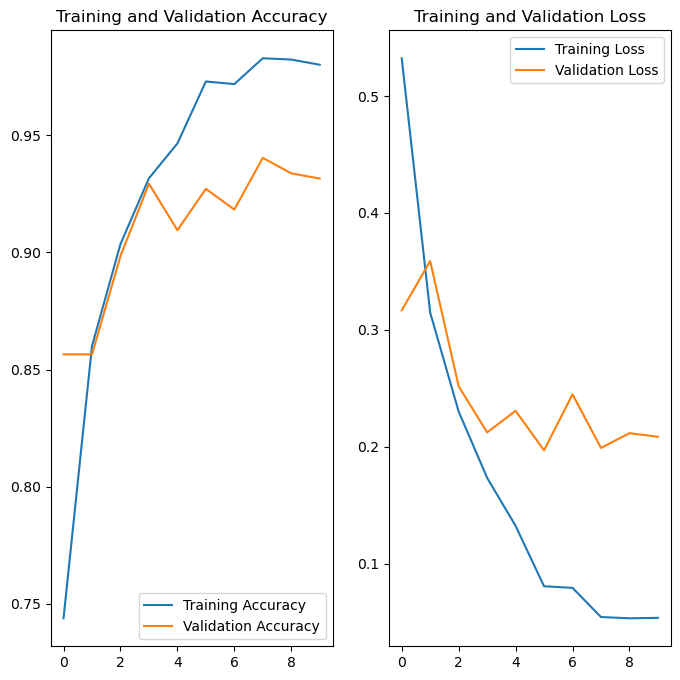

In [16]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
# data augmenetation

In [17]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
#visualize an example of data augmentation

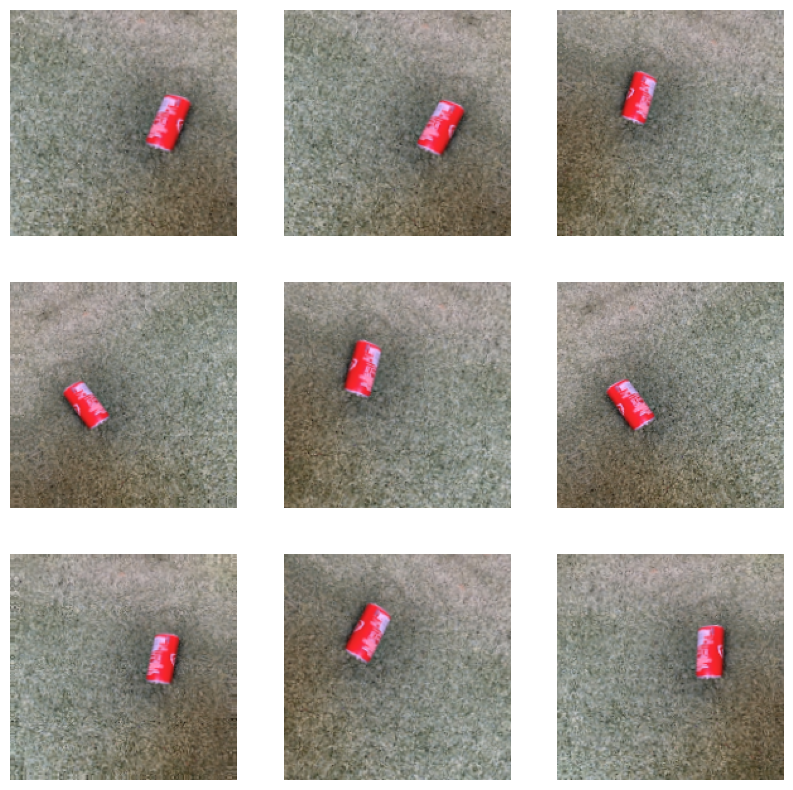

In [18]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
#create new Keras model

In [19]:
num_classes = len(class_names)

model = Sequential([
    data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
epochs = 100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/300
57/57 [==============================] - 15s 219ms/step - loss: 0.5710 - accuracy: 0.7014 - val_loss: 0.3372 - val_accuracy: 0.8499
Epoch 2/300
57/57 [==============================] - 11s 192ms/step - loss: 0.3252 - accuracy: 0.8584 - val_loss: 0.2799 - val_accuracy: 0.8720
Epoch 3/300
57/57 [==============================] - 10s 182ms/step - loss: 0.2627 - accuracy: 0.8953 - val_loss: 0.3266 - val_accuracy: 0.8411
Epoch 4/300
57/57 [==============================] - 11s 187ms/step - loss: 0.2468 - accuracy: 0.9014 - val_loss: 0.2770 - val_accuracy: 0.8852
Epoch 5/300
57/57 [==============================] - 11s 185ms/step - loss: 0.1887 - accuracy: 0.9306 - val_loss: 0.1826 - val_accuracy: 0.9448
Epoch 6/300
57/57 [==============================] - 10s 178ms/step - loss: 0.1765 - accuracy: 0.9284 - val_loss: 0.1442 - val_accuracy: 0.9426
Epoch 7/300
57/57 [==============================] - 11s 188ms/step - loss: 0.1636 - accuracy: 0.9377 - val_loss: 0.1342 - val_accuracy:

KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (300,) and (10,)

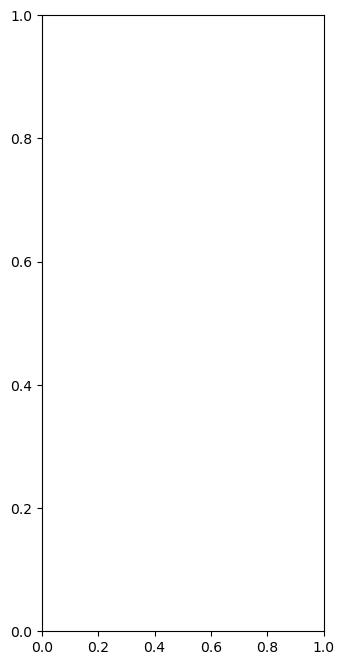

In [22]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
## Predict on new data

In [30]:
import numpy as np
path='image.jpg'
img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 60ms/step
This image most likely belongs to converse with a 100.00 percent confidence.


In [29]:
#save our model
model.save('saved_model/my_model')


INFO:tensorflow:Assets written to: saved_model/my_model\assets


INFO:tensorflow:Assets written to: saved_model/my_model\assets
